In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data=pd.read_excel("/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1_8_1_1.xls")
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


**Data Import**

In [ ]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [ ]:
data.shape

(1200, 28)

In [ ]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

**Departmentwise analysis**

In [ ]:
# A new pandas Dataframe is created to analyze department wise performance as asked
dept=data.iloc[:,[5,27]].copy()
dept_per=dept.copy()


In [ ]:
#Finding out the mean performance of all the departments and plotting its bar graph using seaborn
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

,PerformanceRating
EmpDepartment,
Data Science,3.050000
Development,3.085873
Finance,2.775510
Human Resources,2.925926
Research & Development,2.921283
Sales,2.860590


<Axes: xlabel='EmpDepartment', ylabel='PerformanceRating'>

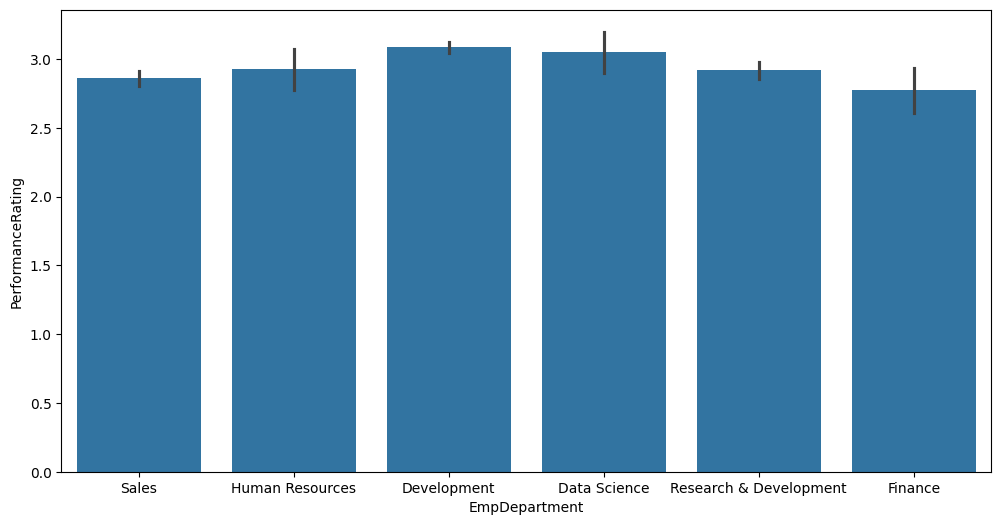

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=dept_per['EmpDepartment'],y=dept_per['PerformanceRating'])

In [ ]:
#Analyze each department separtely

dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

In [ ]:
#Creating a new dataframe to analyze each department separately
department=pd.get_dummies(dept_per['EmpDepartment'])
performance=pd.DataFrame(dept_per['PerformanceRating'])
dept_rating=pd.concat([department,performance],axis=1)

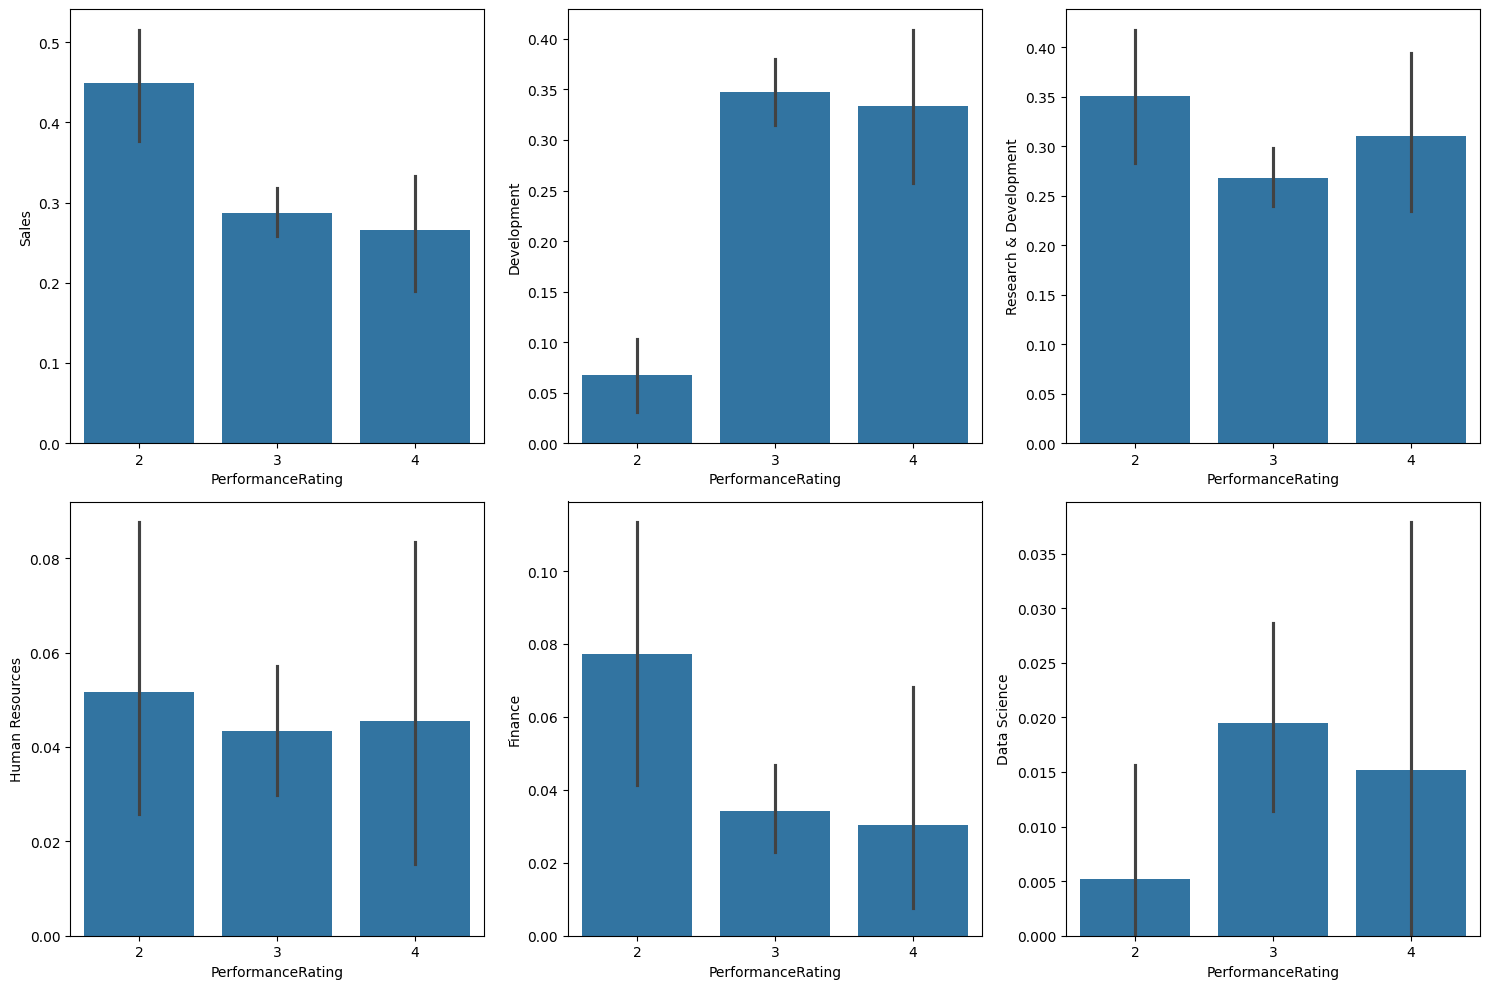

In [ ]:
#Plotting a separate bar graph for performance of each departmentnusing seaborn
plt.figure(figsize=(15, 10)) # Create a figure with specified size

# Subplots for each department
plt.subplot(2, 3, 1)  # Subplot 1: Sales
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Sales'])
plt.subplot(2, 3, 2)  # Subplot 2: Development
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Development'])
plt.subplot(2, 3, 3)  # Subplot 3: Research & Development
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Research & Development'])
plt.subplot(2, 3, 4)  # Subplot 4: Human Resources
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Human Resources'])
plt.subplot(2, 3, 5)  # Subplot 5: Finance
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Finance'])
plt.subplot(2, 3, 6)  # Subplot 6: Data Science
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Data Science'])

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()  # Display the plot

In [ ]:
#data Processing

In [ ]:
#Encoding all the ordinal columns and creating a dummy variable for them to see if there are any ef
enc=LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
  data.iloc[:,i]=enc.fit_transform(data.iloc[:,i])
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


**Feature Selection**

In [ ]:
#Finding out  the correlation to find ou which predictors are significant.
numeric_features = data.select_dtypes(include=np.number).columns.tolist()
if 'EmpNumber' in numeric_features:
    numeric_features.remove('EmpNumber')

# Calculate correlation for the selected numeric features:
correlation_matrix = data[numeric_features].corr()

# Print the correlation matrix:
print(correlation_matrix)

                                   Age  DistanceFromHome  EmpEducationLevel  \
Age                           1.000000          0.020937           0.207313   
DistanceFromHome              0.020937          1.000000           0.045856   
EmpEducationLevel             0.207313          0.045856           1.000000   
EmpEnvironmentSatisfaction    0.013814         -0.017719          -0.037103   
EmpHourlyRate                 0.062867          0.013730           0.014095   
EmpJobInvolvement             0.027216          0.003231           0.027544   
EmpJobLevel                   0.509139          0.017270           0.100734   
EmpJobSatisfaction           -0.002436         -0.003036           0.000357   
NumCompaniesWorked            0.284408         -0.021411           0.128674   
EmpLastSalaryHikePercent     -0.006105          0.044974           0.002358   
EmpRelationshipSatisfaction   0.049749         -0.009509          -0.016690   
TotalWorkExperienceInYears    0.680886          0.02

In [ ]:
#Here we have selected only the important columns
y=data.PerformanceRating
#X=data.iloc[:,0:-1]  All predictors were selected it resulted in dropping of accuracy
x=data.iloc[:,[4,5,9,16,20,21,22,23,24]] #Taking only variables with correlation coeffecient greater than 0.1
x.head()

,MaritalStatus,EmpDepartment,EmpEducationLevel,OverTime,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion
0,Single,Sales,3,No,2,2,10,7,0
1,Single,Sales,4,No,2,3,7,7,1
2,Married,Sales,4,Yes,2,3,18,13,1
3,Divorced,Human Resources,4,No,2,2,21,6,12
4,Single,Sales,4,No,1,3,2,2,2


In [ ]:
#Splitting into train and test for calculating the accuracy
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
#Standardization technique is uesd
#Standardization technique is uesd
sc=StandardScaler()

# Get a list of numeric features in x_train
numeric_features_x_train = x_train.select_dtypes(include=np.number).columns

# Apply StandardScaler only to numeric features
x_train[numeric_features_x_train] = sc.fit_transform(x_train[numeric_features_x_train])
x_test[numeric_features_x_train] = sc.transform(x_test[numeric_features_x_train])

In [ ]:
x_train.shape

(840, 9)

In [ ]:
x_test.shape

(360, 9)

**Logistic Regression**

In [ ]:
#Logistic Regression

#training the model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Assuming x_train and x_test are pandas DataFrames

# 1. Standardize Numeric Features
sc = StandardScaler()
numeric_features_x_train = x_train.select_dtypes(include=np.number).columns
x_train[numeric_features_x_train] = sc.fit_transform(x_train[numeric_features_x_train])
x_test[numeric_features_x_train] = sc.transform(x_test[numeric_features_x_train])

# 2. One-Hot Encode Categorical Features
categorical_features_x_train = x_train.select_dtypes(exclude=np.number).columns
x_train = pd.get_dummies(x_train, columns=categorical_features_x_train, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_features_x_train, drop_first=True)

# 3. Align Columns between Training and Testing Sets
x_train, x_test = x_train.align(x_test, join='inner', axis=1)

# 4. Fit the Logistic Regression Model
model_logr = LogisticRegression()
model_logr.fit(x_train, y_train) # This line should now work without errors

LogisticRegression()

In [ ]:
#Predicting the model
y_predict_log=model_logr.predict(x_test)

In [ ]:
#Finding accuracy,precision, recall and confussion matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.7527777777777778
              precision    recall  f1-score   support

           2       0.77      0.16      0.26        63
           3       0.75      0.99      0.85       264
           4       0.00      0.00      0.00        33

    accuracy                           0.75       360
   macro avg       0.51      0.38      0.37       360
weighted avg       0.69      0.75      0.67       360

